In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

pd.set_option("display.max_columns", None)
plt.style.use("seaborn-whitegrid")

df = pd.read_csv("data/all_survey_answers.csv", index_col=0)

numerical_features = df.select_dtypes(np.number).columns
ses_proxies = ["internet", "traveltime", "address", "Mjob", "Fjob", "Medu", "Fedu"]

df.head()

/var/folders/_c/vr22_fg12d7flyy_ll_m264w0000gp/T/ipykernel_29289/1647535835.py:10: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course,G_mean
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,math,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,math,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,math,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,math,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,math,8.666667


## Variable variance exploration

### changing nominal to ordinal types (not the approach they take in the SES PCA paper)

In [17]:
df_variance = df.copy()

df_variance['internet'] = df_variance['internet'].map({"no": 0, "yes": 1})
df_variance['address'] = df_variance['address'].map({"R": 0, "U": 1})
df_variance['Mjob'] = df_variance['Mjob'].map({"at_home": 0, "health": 1, "other": 2, "services": 3, "teacher": 4})
df_variance['Fjob'] = df_variance['Fjob'].map({"at_home": 0, "health": 1, "other": 2, "services": 3, "teacher": 4})

df_variance[ses_proxies].var(axis=0).sort_values(ascending=False)

Mjob          1.549563
Medu          1.265415
Fedu          1.209864
Fjob          0.745671
traveltime    0.535425
address       0.198656
internet      0.164809
dtype: float64

### One Hot Encoding Mjob and Fjob (the approach they take in the SES PCA paper)

In [18]:
# One Hot Encoding features that are not numerical
df_ohe = pd.get_dummies(df[ses_proxies], columns=["Mjob", "Medu", "Fedu", "Fjob", "address", "traveltime"])
df_ohe['internet'] = df_ohe['internet'].map({"no": 0, "yes": 1})
df_ohe.head()

,internet,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,address_R,address_U,traveltime_1,traveltime_2,traveltime_3,traveltime_4
0,0,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,True,False,False
1,1,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,True,False,False,False
2,1,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,True,False,False,False
3,1,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,True,False,False,False
4,0,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False


In [19]:
# Variance of the one-hot encoded features (all features are binary in df_ohe)
df_ohe.var().sort_values(ascending=False)

Fjob_other       0.246709
traveltime_1     0.240871
Mjob_other       0.236346
Fedu_2           0.214236
traveltime_2     0.212767
Medu_4           0.207392
Fjob_services    0.201658
Medu_2           0.200383
address_U        0.198656
address_R        0.198656
Fedu_1           0.185260
Mjob_services    0.176689
Medu_3           0.176168
Fedu_3           0.172472
Fedu_4           0.168685
internet         0.164809
Medu_1           0.156199
Mjob_at_home     0.151438
Mjob_teacher     0.109120
Mjob_health      0.072444
traveltime_3     0.068381
Fjob_teacher     0.058440
Fjob_at_home     0.055914
Fjob_health      0.037766
traveltime_4     0.022482
Fedu_0           0.008555
Medu_0           0.008555
dtype: float64

## PCA analysis

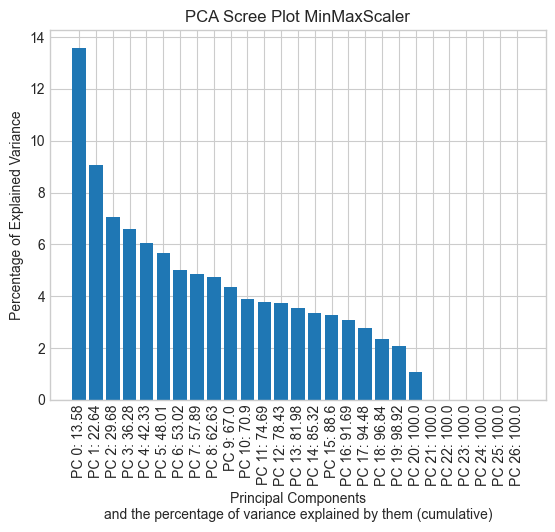

In [20]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_ohe)

# perform PCA
pca = PCA()
pca.fit_transform(scaled_data)

# get variance ratios
scree = list(pca.explained_variance_ratio_ * 100)

# get cumulative variance ratios
cumulative_scree = [sum(scree[: i + 1]) for i in range(len(scree))]

# make labels for scree plot
labels = [
    f"PC {str(i)}: {round(cumulative_scree[i], 2)}"
    for i in range(0, len(cumulative_scree))
]

# Plot principle components
plt.bar(x=range(1, len(scree) + 1), height=scree, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Components\nand the percentage of variance explained by them (cumulative)")
plt.xticks(rotation=90)
plt.title("PCA Scree Plot MinMaxScaler")
plt.show()

In [21]:
# make a dataframe of the PCA coordinates
pca1 = PCA(n_components=4)
df_pca = pd.DataFrame(
    pca1.fit_transform(scaled_data), columns=["PC1", "PC2", "PC3", "PC4"]
)

In [22]:
# 2D plot (was not really useful)
# fig = px.scatter(
#     x=df_pca.PC1, y=df_pca.PC2, color=df.G3, color_continuous_scale="tempo"
# )
# # set x and y labels
# fig.update_layout(
#     xaxis_title="PC1",
#     yaxis_title="PC2",
#     title={
#         "text": "PCA on SES Proxies",
#         "y": 0.95,
#         "x": 0.5,
#         "xanchor": "center",
#         "yanchor": "top",
#     },
#     coloraxis_colorbar=dict(title="Final Grade"),
# )

# fig.update_traces(mode="markers")
# fig.show()

In [23]:
fig = px.scatter_3d(
    x=df_pca["PC1"],
    y=df_pca["PC2"],
    z=df_pca["PC3"],
    color=df["G3"],
    opacity=0.7,
    color_continuous_scale="tempo",
)

fig.update_layout(
    scene=dict(xaxis_title="PC1", yaxis_title="PC2", zaxis_title="PC3"),
    coloraxis_colorbar=dict(title="Final Grade"),
)
fig.update_traces(mode="markers")
fig.show()

### Analysing factor scores and variable precense in principle components

In [24]:
# Get the factor scores for each feature
factor_scores_PC1 = pca.components_[0]
factor_scores_df = pd.DataFrame(
    {"factor_scores": factor_scores_PC1, "features": df_ohe.columns}
).sort_values(by="factor_scores", ascending=False)

factor_scores_df.set_index("features", inplace=True)
factor_scores_df

,factor_scores
features,
address_R,0.280172
Medu_1,0.265666
Fedu_1,0.264933
Mjob_at_home,0.212313
Fjob_other,0.186489
traveltime_2,0.172726
Mjob_other,0.170600
traveltime_3,0.154010
Medu_2,0.146295


/var/folders/_c/vr22_fg12d7flyy_ll_m264w0000gp/T/ipykernel_29289/2900065816.py:32: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



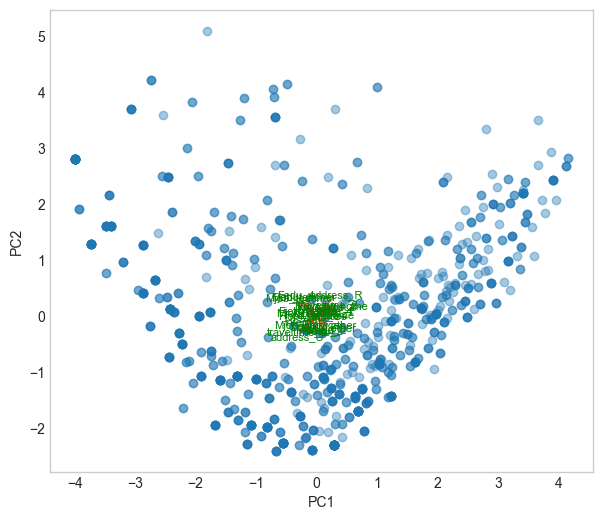

In [25]:
# Make biplot
pca_variable_explained = pd.DataFrame(pca.components_, columns=df_ohe.columns)

fig, ax = plt.subplots(figsize=(7, 6), dpi=100)
ax.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.4)

for i in pca_variable_explained:
    current_arrow = pca_variable_explained[i][:2]
    ax.arrow(
        0,
        0,
        current_arrow[0],
        current_arrow[1],
        color="r",
        alpha=0.5,
        length_includes_head=True,
        head_width=0.02,
        head_length=0.02,
    )
    ax.text(
        current_arrow[0] * 1.15,
        current_arrow[1] * 1.15,
        i,
        color="g",
        ha="center",
        va="center",
        fontsize=8,
    )
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
fig.show()

count    1044.000000
mean       -0.281109
std         0.790046
min        -1.840175
25%        -0.870783
50%        -0.239833
75%         0.297858
max         1.382300
Name: SES_score, dtype: float64

<Axes: xlabel='SES_score', ylabel='Count'>

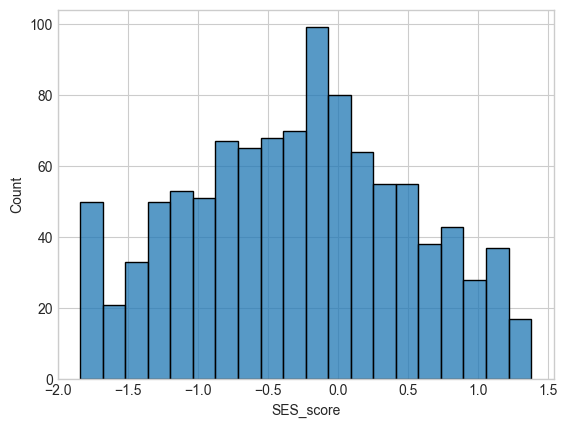

In [26]:
# aggregate factor scores for each row to calculate SES scores
fs = {}

for idx, row in df_ohe.iterrows():
    current_fs = 0
    
    # for each value in current row
    for i in range(len(row)):
        if row[i] == 1:
            current_feature = df_ohe.columns[i]
            current_fs += factor_scores_df.loc[current_feature].values[0] 
    
    fs[idx] = current_fs

df_ohe['SES_score'] = pd.DataFrame.from_dict(fs, orient='index', columns=['factor_score'])['factor_score']

display(df_ohe['SES_score'].describe())

sns.histplot(df_ohe['SES_score'], bins=20)

### Create Socio economic status variable

In [27]:
quantile_60 = df_ohe['SES_score'].quantile(0.6) # 60th percentile
df['SES_score'] = df_ohe['SES_score']
df['SES'] = df_ohe['SES_score'].apply(lambda x: 'middle/rich' if x < quantile_60 else 'lower')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course,G_mean,SES_score,SES
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,math,5.666667,-0.733077,middle/rich
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,math,5.333333,0.176471,lower
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,math,8.333333,0.176471,lower
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,math,14.666667,-1.234671,middle/rich
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,math,8.666667,-0.323278,middle/rich


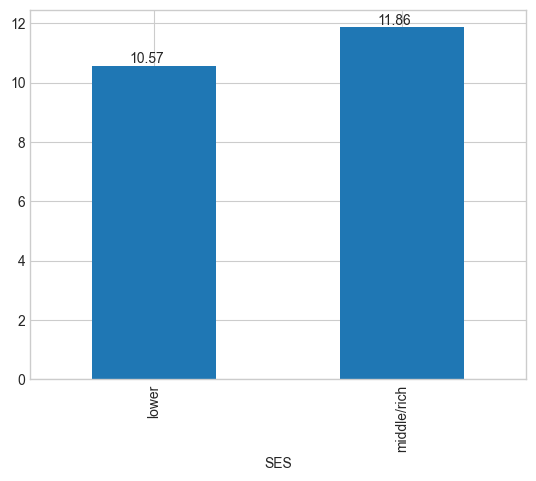

In [28]:
# check that the rich/middle has higher grades than the lower class
df.groupby("SES")["G3"].mean().plot(kind="bar")

# add bar labels
for i in range(len(df.groupby("SES")["G3"].mean())):
    plt.text(
        x=i - 0.1,
        y=df.groupby("SES")["G3"].mean()[i] + 0.1,
        s=round(df.groupby("SES")["G3"].mean()[i], 2),
    )

In [29]:
df.to_csv("data/all_students_and_SES.csv", index=False)